In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! echo $PYTHONPATH
%env PYTHONPATH="$/env/python:/content/drive/MyDrive/traj-space/src"
! echo $PYTHONPATH

import sys
sys.path.append('/content/drive/MyDrive/traj-space/src')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
"$/env/python:/content/drive/MyDrive/traj-space/src"
env: PYTHONPATH="$/env/python:/content/drive/MyDrive/traj-space/src"
"$/env/python:/content/drive/MyDrive/traj-space/src"


In [ ]:
!pip install gudhi dtw-python dtaidistance alive_progress scikit-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 4
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

n = 2
a = np.random.randn(n,n)
b = np.random.randn(n,n)

print(a)
a = np.array([[ 0.89090698,  1.31282977], [-0.67674201, -1.17620531]])

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([-a[i,j]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)]),
            sum([sum([a[i,j]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi) for i in range(n)]) for j in range(n)])])


[[-2.28792512 -2.11257287]
 [-0.89694317  0.48337444]]


In [ ]:
def flow(init_tps):
    dt = 0.1
    num_steps = 25

    tps = np.empty((num_steps + 1, 2))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 625
sqrt_N = 25.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

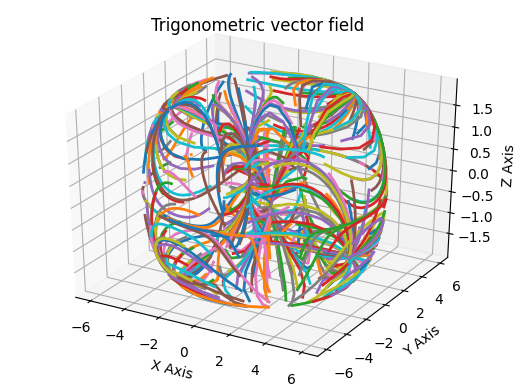

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trigonometric vector field")

plt.show()
traj_list = xyzs

In [ ]:
t2s = Traj2Sim()

load=True

if load == False:
    t2s.set_trajectories(traj_list)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='/content/drive/MyDrive/traj-space/examples/torus/grad_random_trig_625_2.npy')
if load == True:
    t2s.load_bifilt(filename='/content/drive/MyDrive/traj-space/examples/torus/grad_random_trig_625_2.npy')

|████████████████████████████████████████| 195000/195000 [100%] in 59:52.9 (54.27/s)                                    


(26, 625, 625)


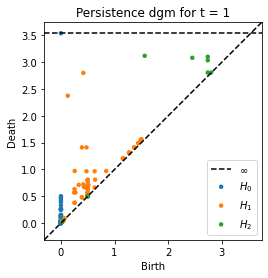

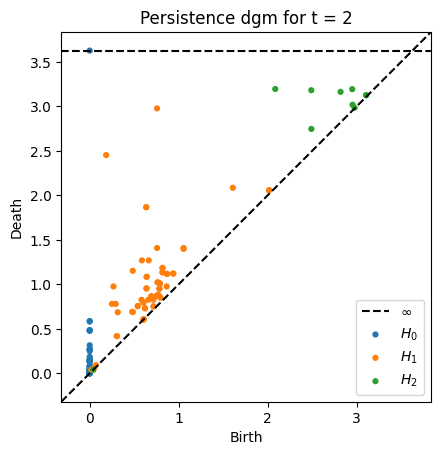

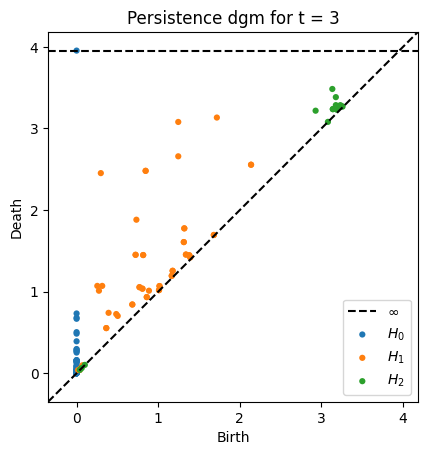

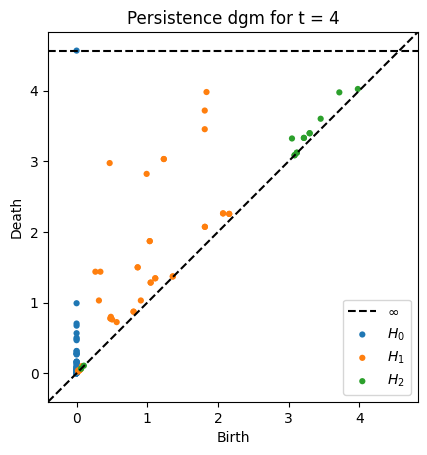

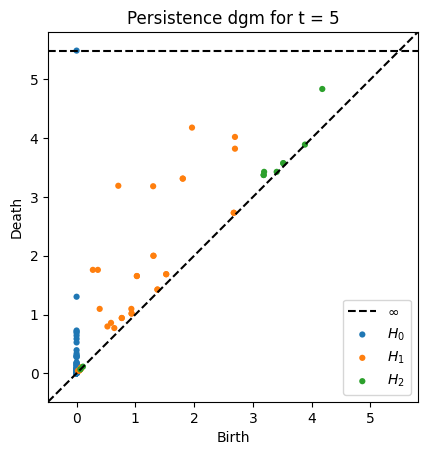

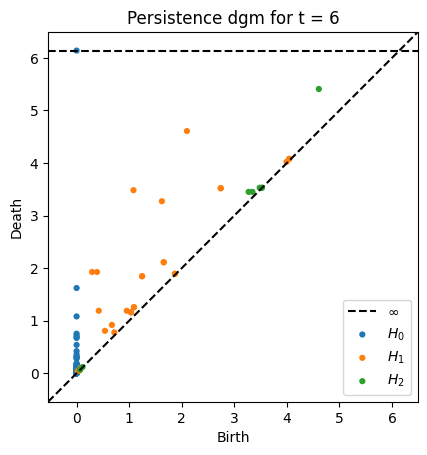

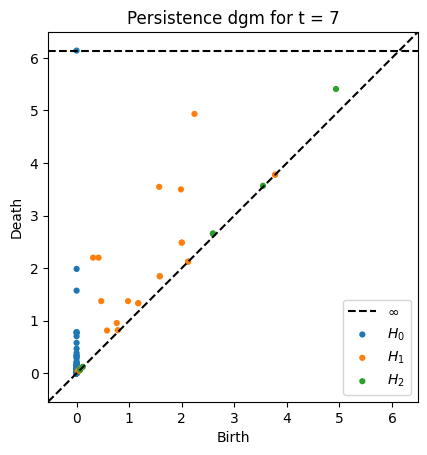

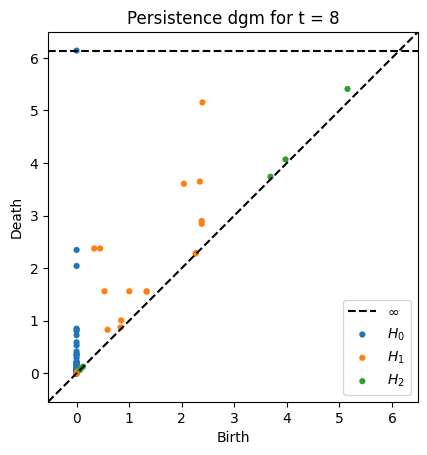

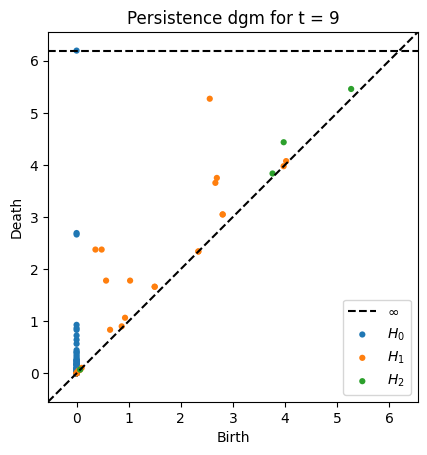

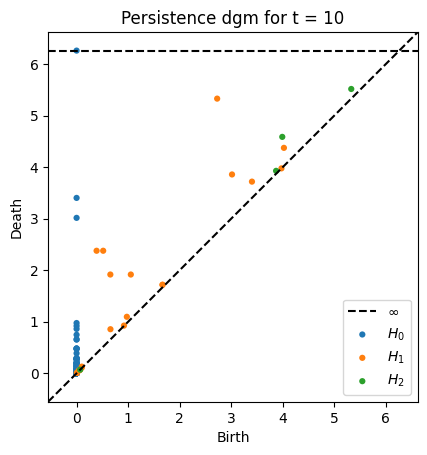

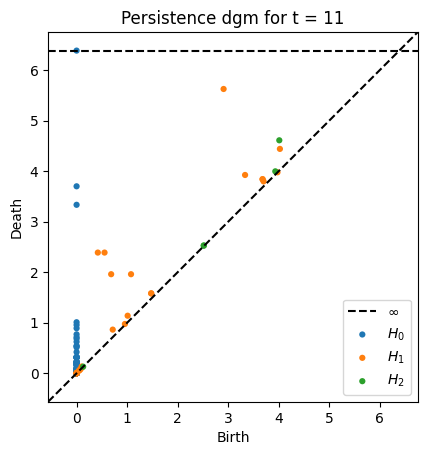

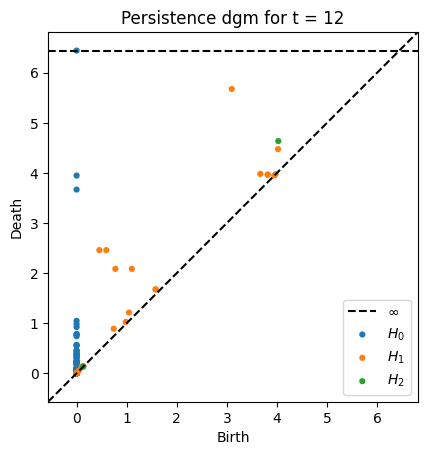

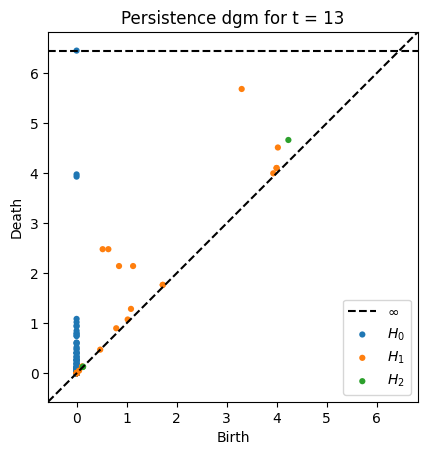

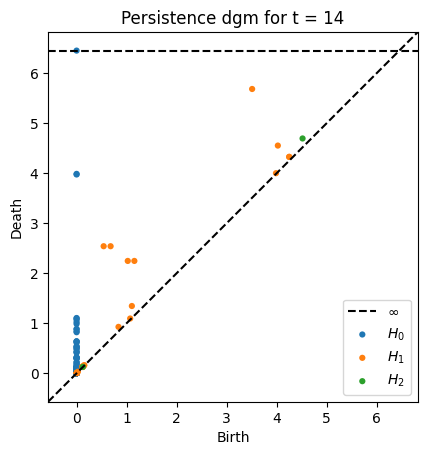

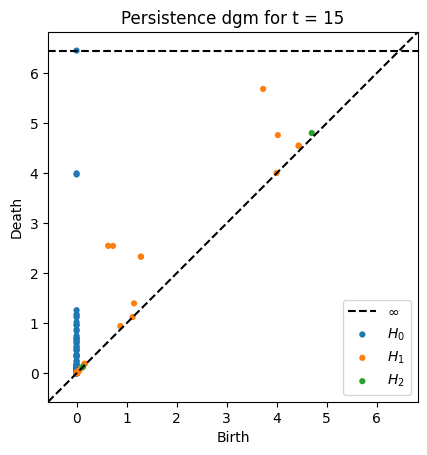

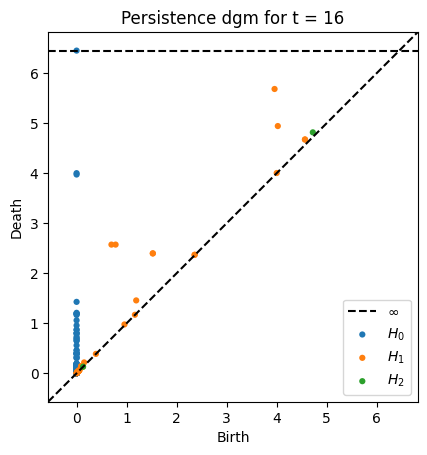

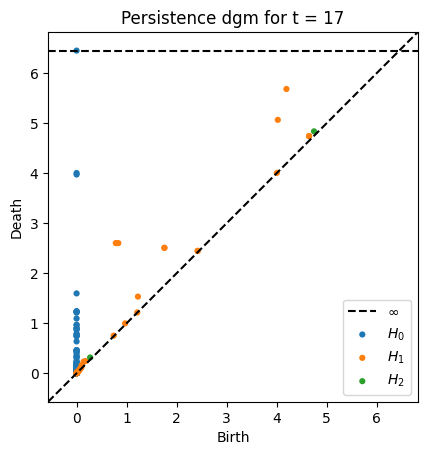

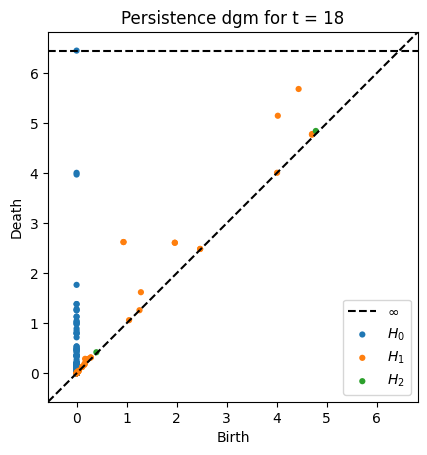

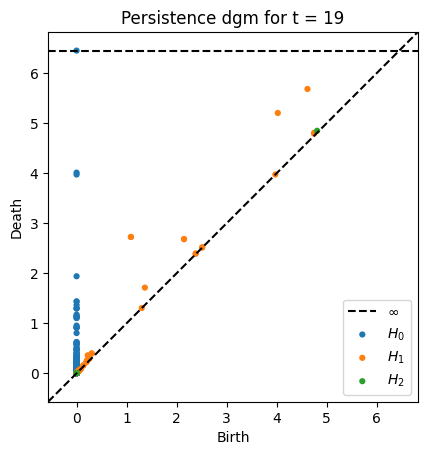

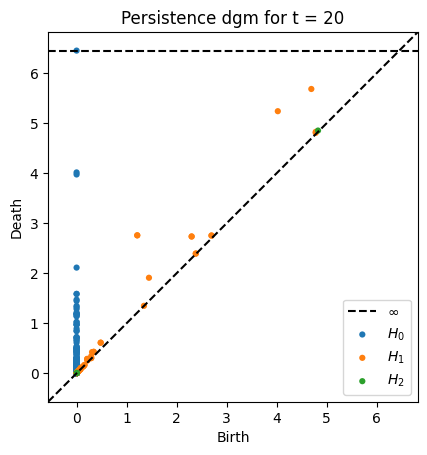

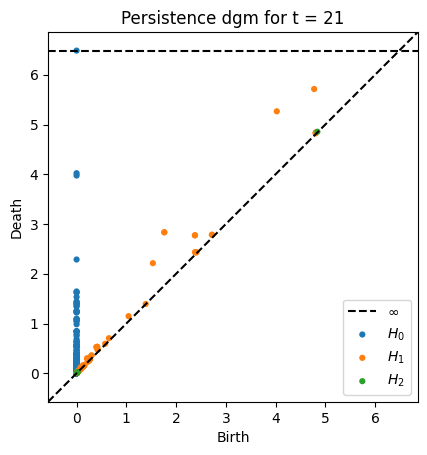

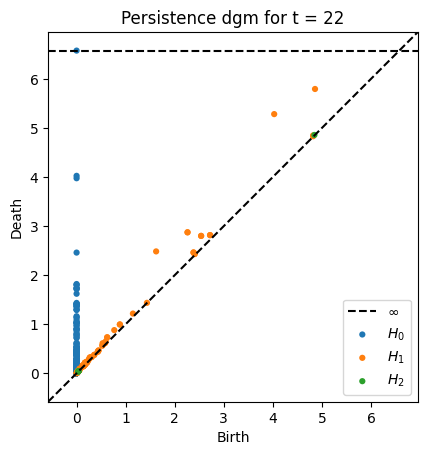

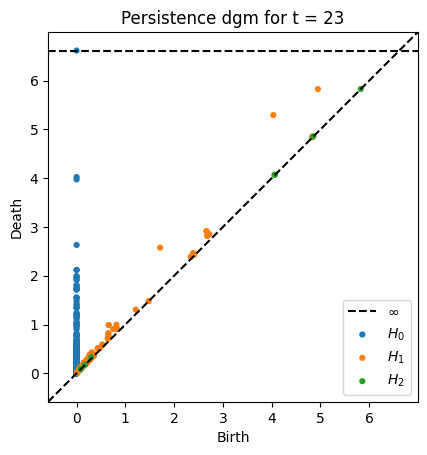

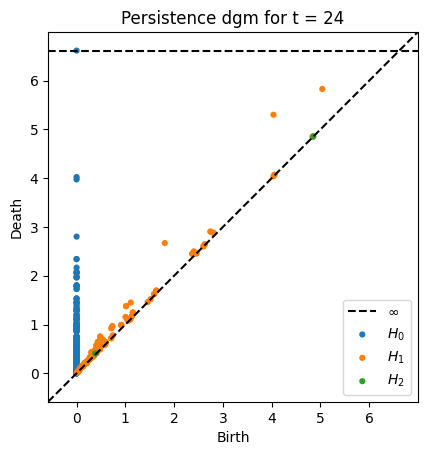

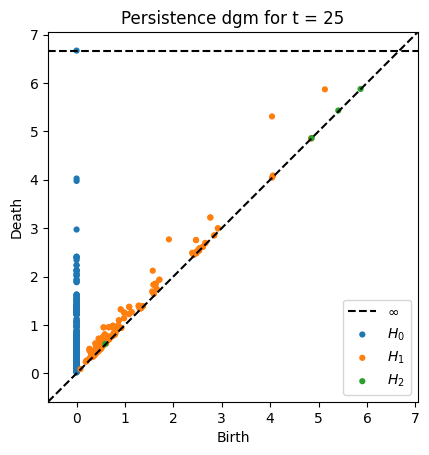

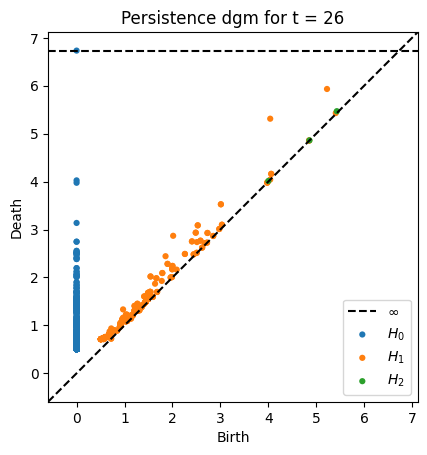

In [ ]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)


[[ 5.98095428  0.47768806  0.        ]
 [ 5.5512321   2.27680086  0.        ]
 [ 4.62129878  3.82669539  0.        ]
 ...
 [ 3.67503    -4.60191984 -0.65624345]
 [ 4.97412778 -3.16021974 -0.64503745]
 [ 5.72666203 -1.41022746 -0.63131833]]


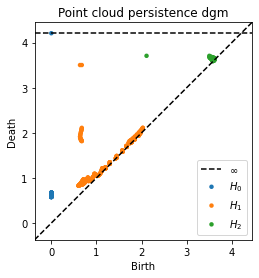

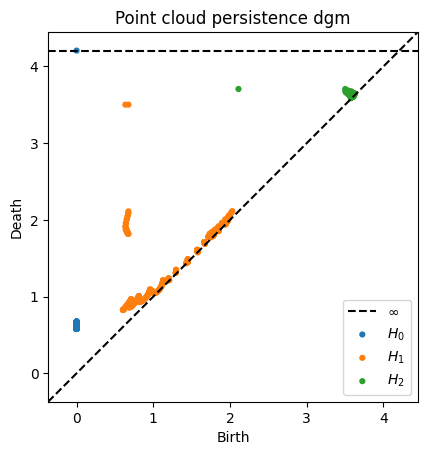

[1.31640345 1.35270935 1.35270935 1.38526607 1.38526607 1.41376495
 1.41376495 1.43478936 2.82657546 2.86633825]
[0.13962841 0.14050221 0.14227557 0.14227557 0.15389609 0.16922355
 0.17076135 0.17626214 0.20422482 1.59601092]


In [ ]:
N = len(traj_list)
m = traj_list[0].shape[0]
m=1
X = np.zeros((m*N, 3))
for i in range(N):
  X[i*m:(i+1)*m,:] = traj_list[i][5:m+5,1:]
print(X)
#print(traj_list[0])

from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

dgms = ripser(X, maxdim=2)['dgms']
plt.clf()
plt.title('Point cloud persistence dgm')
plot_diagrams(dgms, show = True)
plt.clf()
plt.title('Point cloud persistence dgm')
plot_diagrams(dgms, show = True)
#print(dgms[1])
sorted_indices = np.array((dgms[1].shape[0], 1))
sorted_indices = dgms[1][:,1]-dgms[1][:,0]
sorted_indices = np.sort(sorted_indices)
print(sorted_indices[-10:])
sorted_indices = np.array((dgms[2].shape[0], 1))
sorted_indices = dgms[2][:,1]-dgms[2][:,0]
sorted_indices = np.sort(sorted_indices)
print(sorted_indices[-10:])